# Github
- branch: feature/temporary-code
- -> https://github.com/youna1008/cmu24_lsma_project


## Setting up the environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
import cv2

file_path = "dataset/1/"
file_coronal = "02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm"
file_sagittal = "174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962.dcm"
file_report = "s50414267.txt"

## Import image

In [2]:
# %%
# Import image
dcm_coronal, dcm_sagittal = pydicom.dcmread(file_path + file_coronal), pydicom.dcmread(
    file_path + file_sagittal
)

## Metadata extraction

In [3]:
metadata = {elem.tag: elem.value for elem in dcm_coronal.iterall() if (elem.VR != "SQ")}

metadata_file_path = "./demo_coronal_metadata.txt"
with open(metadata_file_path, "w") as f:
    for tag, value in metadata.items():
        f.write(f"{tag}: {value}\n")

## Image extraction

(-0.5, 2543.5, 3055.5, -0.5)

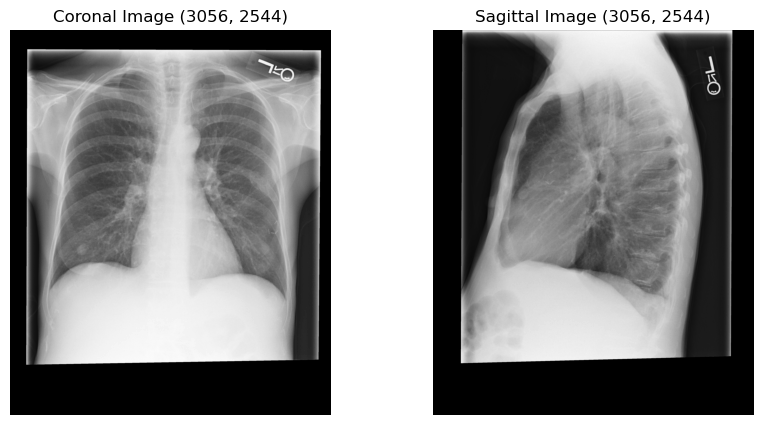

In [4]:
raw_coronal, raw_sagittal = dcm_coronal.pixel_array, dcm_sagittal.pixel_array
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(raw_coronal, cmap="gray")
axs[0].set_title(f"Coronal Image {raw_coronal.shape}")
axs[0].axis("off")

axs[1].imshow(raw_sagittal, cmap="gray")
axs[1].set_title(f"Sagittal Image {raw_sagittal.shape}")
axs[1].axis("off")

# Image preprocessing


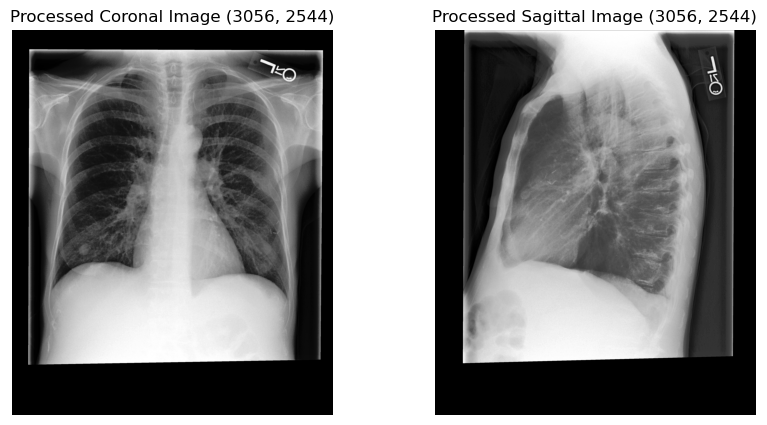

In [5]:
processed_images = []
for raw_image, dcm_file in zip(
    [raw_coronal, raw_sagittal], [dcm_coronal, dcm_sagittal]
):
    raw_image = raw_image - raw_image.min()
    normalized_image = raw_image / raw_image.max()
    rescaled_image = (normalized_image * 255).astype(np.uint8)

    if dcm_file.PhotometricInterpretation == "MONOCHROME1":
        rescaled_image = cv2.bitwise_not(rescaled_image)

    final_image = cv2.equalizeHist(rescaled_image)
    processed_images.append(final_image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, final_image, title in zip(
    axs, processed_images, ["Processed Coronal Image", "Processed Sagittal Image"]
):
    ax.imshow(final_image, cmap="gray")
    ax.set_title(f"{title} {final_image.shape}")
    ax.axis("off")
plt.show()

# Image resizing


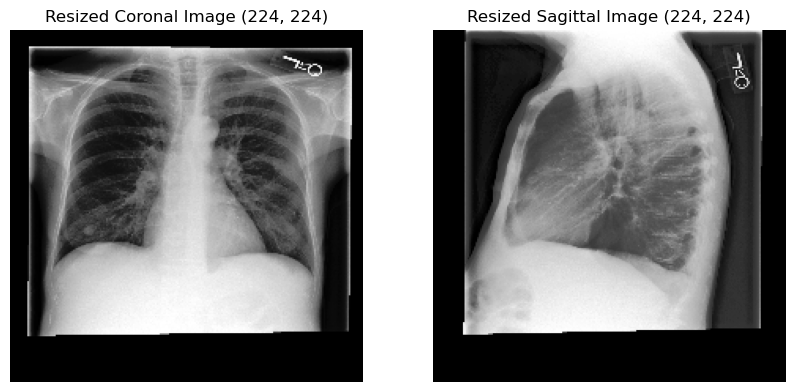

In [6]:
resized_images = [cv2.resize(image, (224, 224)) for image in processed_images]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for ax, resized_image, title in zip(
    axs, resized_images, ["Resized Coronal Image", "Resized Sagittal Image"]
):
    ax.imshow(resized_image, cmap="gray")
    ax.set_title(f"{title} {resized_image.shape}")
    ax.axis("off")
plt.show()

# Report extraction

In [7]:
with open(file_path + file_report, "r") as report_file:
    report_text = report_file.read()
    findings_start = report_text.find("FINDINGS:")
    if findings_start != -1:
        findings_text = report_text[findings_start:]

print(findings_text)

FINDINGS: 
 
 There is no focal consolidation, pleural effusion or pneumothorax.  Bilateral
 nodular opacities that most likely represent nipple shadows. The
 cardiomediastinal silhouette is normal.  Clips project over the left lung,
 potentially within the breast. The imaged upper abdomen is unremarkable.
 Chronic deformity of the posterior left sixth and seventh ribs are noted.
 
 IMPRESSION: 
 
 No acute cardiopulmonary process.

